In [265]:
# !pip install scikit-learn statsmodels

In [495]:
# Import necessary libraries
import numpy as npmainroad
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [496]:
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data
# Import dataset
data = pd.read_csv("./data/Housing.csv")

In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [498]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [499]:
# View
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [500]:
# Format the data
df = data.copy()

In [501]:
### Ordinal encoding

In [502]:
# Format the data
# yn_to_int = {"yes":1,"no":0}
cols_str = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
# Convert categories into numerical values
# df[cols_str] = df[cols_str].replace(yn_to_int).infer_objects(copy=False).astype(np.int8)

# USing Sklearn
ordinal_encoder = OrdinalEncoder(categories=[["no", "yes"]] * len(cols_str))
df[cols_str] = ordinal_encoder.fit_transform(df[cols_str]).astype(np.int8)

In [503]:
### One hot encoding

In [504]:
# One hot encoding with pandas
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True, dtype=np.uint8)

# Ordinal encoding
ordinal_encoder_fs = OrdinalEncoder(categories=[["furnished", "semi-furnished"]] * len(cols_str))
# One hot encoding with Sklearn
# onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
# ohe_data = onehot_encoder.fit_transform(df[["furnishingstatus"]])
# ohe_df = pd.DataFrame(ohe_data, columns=onehot_encoder.get_feature_names_out(['furnishingstatus']))
# df = pd.concat([df, ohe_df], axis=1).drop('furnishingstatus', axis=1)

In [505]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [506]:
### Feature selection
# from sklearn.feature_selection import VarianceThreshold

### Variance Threshold
# Remove features with near-zero variance

# vt = VarianceThreshold(0.01)
# vt.fit_transform(df)

<Axes: >

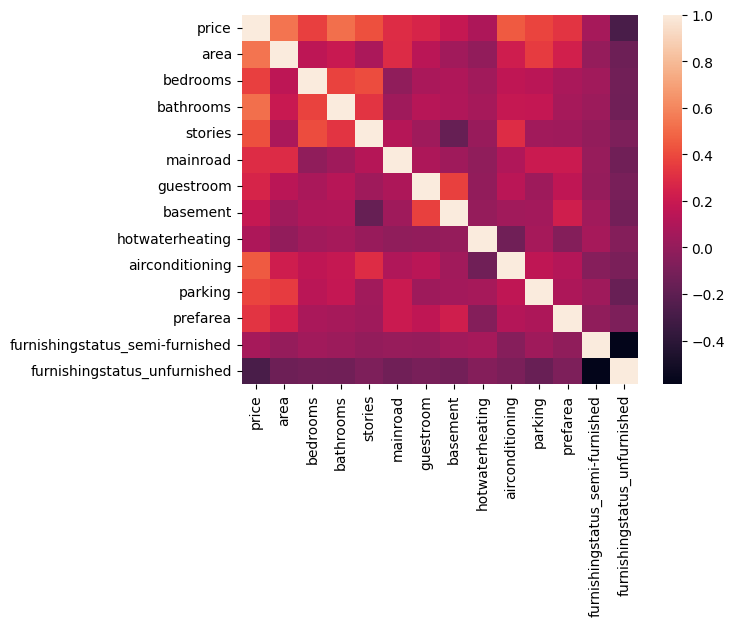

In [507]:
### Correlation-based selection
# Remove highly correlated features

correlation = df.corr()
sns.heatmap(correlation)

In [508]:
# # Boolean mask to select the upper triangular portion
# corr = correlation.abs()
# select = np.triu(np.ones(corr.shape), k=1).astype(bool) 
# upper = corr.where(select)

# # Columns to drop
# to_drop = [c for c in upper.columns if any(upper[c] > 0.9)]

Checking VIF (Variance Inflation Factor) is the good way to handle multicollinearity. While a correlation matrix only looks at pairs of variables, VIF detects if a variable can be predicted by a combination of all other variables.

The intuition behind VIF (Variance Inflation Factor) is hidden in its name: it measures how much the variance (uncertainty) of an estimated regression coefficient is inflated due to collinearity with other variables.

VIF is calculated using the formula:
$VIF_i = \frac{1}{1−R_i^2}$

Where  is the R-squared value obtained by regressing the  feature against all other features.
We might have three features: `x`, `y`, and `z`. `x` might not have a 0.9 correlation with `y` alone, but it is perfectly predicted by the combination of `y` and `z`. A correlation matrix might miss this, but VIF will catch it and give `x` a massive score.

The VIF value starts at 1 and has no upper limit. Here is the standard rule of thumb used in industry:

* **VIF = 1:** No correlation at all.
* **VIF 1–5:** Moderate correlation (usually acceptable).
* **VIF > 5:** High multicollinearity (this feature is becoming redundant).
* **VIF > 10:** Very high multicollinearity (you should definitely drop this feature).

---

If a feature with a VIF > 10:
1. **Drop the feature** with the highest VIF.
2. **Recalculate VIF** for the remaining features (dropping one often lowers the VIF of the others).
3. Repeat until all features are below your threshold (usually 5 or 10).

In [509]:
def remove_outlier(df):
    Q1 = df['area'].quantile(0.25)
    Q3 = df['area'].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = (Q1 - 1.5 * IQR)
    higher_lim = (Q3 + 1.5 * IQR)
    df = df[~((df['area'] < lower_lim) | (df['area'] > higher_lim))] # Keep only data in valid range
    return df,lower_lim,higher_lim

    
df,l,h = remove_outlier(df)
print("Outliers removed :",(df.shape[0]-df_new.shape[0]))

Outliers removed : 3


In [510]:
### Variance Inflation Factor
# We usually check VIF on the numeric features only
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculating VIF for each feature
    # VIF = 1 / (1 - R^2)
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data.sort_values(by="VIF", ascending=False)


def remove_redundant_features(X,VIF_tol=10, disp=False):
    n = X.shape[1]
    while True:
        # Get VIF
        vif_scores = calculate_vif(X)

        if disp:
            print(vif_scores)
            
        # Remove redundant features
        X = X.drop(vif_scores[vif_scores["VIF"]>VIF_tol]["feature"],axis=1)

        if n == X.shape[1]:
            break
        n = X.shape[1]    
    return X

<Axes: xlabel='price', ylabel='Density'>

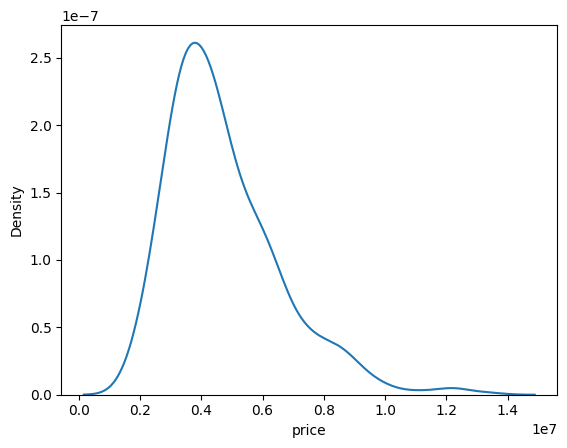

In [511]:
y = df["price"]
sns.kdeplot(y,label="original")

<Axes: xlabel='price', ylabel='Density'>

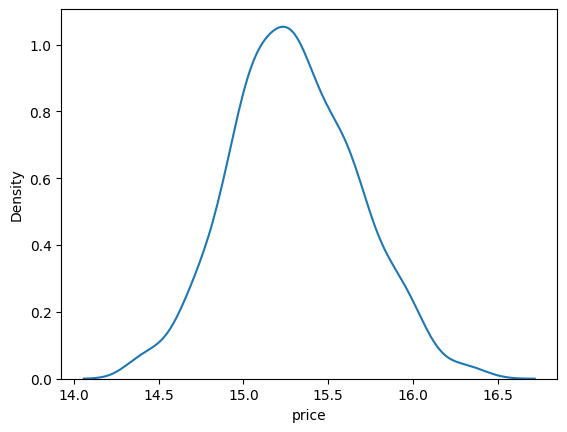

In [512]:
y_transformed = np.log1p(y)
sns.kdeplot(y_transformed,label="transformed")

In [513]:
# Get independednt variables
X = df.drop(["price"],axis=1)
y = df["price"]
TRANSFORM = True

if TRANSFORM:
    y = np.log1p(y)
# X = remove_redundant_features(X)

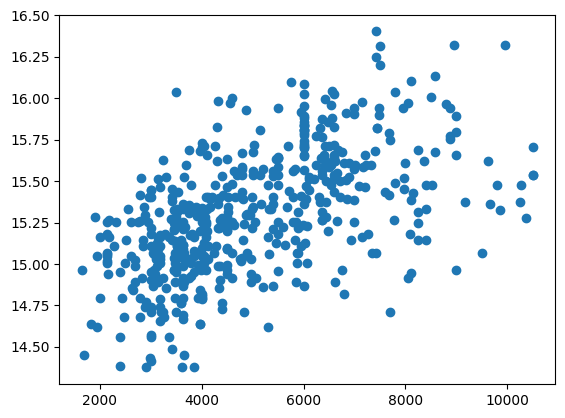

In [515]:
plt.scatter(X["area"],y)

In [516]:
### Standard normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [517]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [518]:
X_train.shape,X_test.shape

((373, 13), (160, 13))

In [519]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [520]:
X_train_scaled

array([[-1.14354449, -1.27295886, -0.56672163, ...,  1.79962117,
         1.1794175 , -0.70142712],
       [ 0.56248653,  0.04231442,  1.48558098, ...,  1.79962117,
         1.1794175 , -0.70142712],
       [ 0.79141082,  0.04231442,  1.48558098, ...,  1.79962117,
         1.1794175 , -0.70142712],
       ...,
       [-0.25510022, -1.27295886, -0.56672163, ..., -0.5556725 ,
        -0.84787618, -0.70142712],
       [-0.80015805, -1.27295886, -0.56672163, ..., -0.5556725 ,
         1.1794175 , -0.70142712],
       [-0.94187309,  1.3575877 , -0.56672163, ..., -0.5556725 ,
         1.1794175 , -0.70142712]], shape=(373, 13))

In [521]:
X_test_scaled

array([[ 1.96873574,  1.3575877 ,  3.53788358, ...,  1.79962117,
         1.1794175 , -0.70142712],
       [-1.38336993,  0.04231442, -0.56672163, ..., -0.5556725 ,
        -0.84787618,  1.42566487],
       [ 0.88952123,  0.04231442, -0.56672163, ...,  1.79962117,
         1.1794175 , -0.70142712],
       ...,
       [ 0.01197812,  1.3575877 ,  1.48558098, ...,  1.79962117,
        -0.84787618, -0.70142712],
       [-0.97185127, -1.27295886, -0.56672163, ..., -0.5556725 ,
        -0.84787618,  1.42566487],
       [ 0.56248653,  0.04231442,  1.48558098, ..., -0.5556725 ,
         1.1794175 , -0.70142712]], shape=(160, 13))

In [522]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

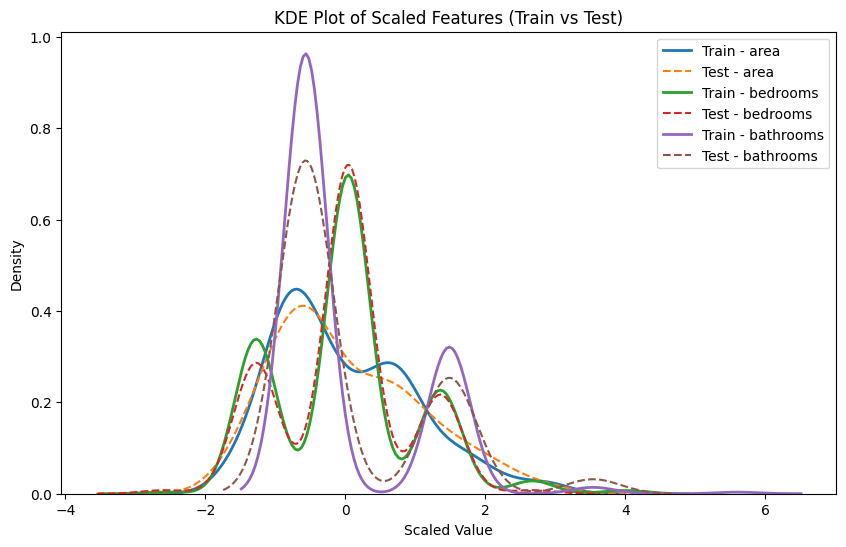

In [523]:
plt.figure(figsize=(10, 6))

for col in X_train_scaled_df.columns[:3]:
    sns.kdeplot(
        X_train_scaled_df[col],
        label=f"Train - {col}",
        linewidth=2
    )
    sns.kdeplot(
        X_test_scaled_df[col],
        label=f"Test - {col}",
        linestyle="--"
    )

plt.legend()
plt.title("KDE Plot of Scaled Features (Train vs Test)")
plt.xlabel("Scaled Value")
plt.ylabel("Density")
plt.show()

In [525]:
# Train
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [526]:
# Instantiate the models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_lasso = Lasso()
model_rf = RandomForestRegressor()

In [527]:
# Fit the model
model_lr.fit(X_train_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [528]:
model_lasso.fit(X_train_scaled,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [529]:
model_dt.fit(X_train_scaled,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [530]:
model_rf.fit(X_train_scaled,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [531]:
def calculate_evals(model,X_test_scaled,y_test,name):
    y_pred = model.predict(X_test_scaled)
    if TRANSFORM:
        # Train model on y_train_log
# Remember to use np.expm1(predictions) to get the real dollar value back!
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    print(f"{name} Mean Squared Error :", mse)
    print(f"{name} Mean Absolute Error:", mae)
    print(f"{name} R2 score:", score)

In [532]:
# Make predictions
calculate_evals(model_lr,X_test_scaled,y_test, "Linear Regression")

Linear Regression Mean Squared Error : 0.056341504787842854
Linear Regression Mean Absolute Error: 0.17978455763741283
Linear Regression R2 score: 0.6527252304585501


In [533]:
calculate_evals(model_dt,X_test_scaled,y_test, "Decision Tree")

Decision Tree Mean Squared Error : 0.11166876754925115
Decision Tree Mean Absolute Error: 0.24925300111629248
Decision Tree R2 score: 0.3117019919565289


In [534]:
calculate_evals(model_lasso,X_test_scaled,y_test, "Lasso")

Lasso Mean Squared Error : 0.1622390986260202
Lasso Mean Absolute Error: 0.33087035490036054
Lasso R2 score: -7.241219599496418e-07


In [537]:
calculate_evals(model_rf,X_test_scaled,y_test, "Random Forests")

Random Forests Mean Squared Error : 0.06394298999555421
Random Forests Mean Absolute Error: 0.1840991957496029
Random Forests R2 score: 0.6058716003749904


In [538]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [539]:
lin_rmses =-cross_val_score(
    model_lr,
    X_train_scaled,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=10
)

print("Linear Regression CV RMSEs:", lin_rmses)

Linear Regression CV RMSEs: [0.18364284 0.19809837 0.20260017 0.19792733 0.20818109 0.20072914
 0.19051304 0.2078676  0.23548762 0.18887807]


In [446]:
print("\nCross-Validation Performance (Linear Regression):")
pd.Series(lin_rmses).describe()


Cross-Validation Performance (Linear Regression):


count    1.000000e+01
mean     1.022664e+06
std      1.885684e+05
min      8.019161e+05
25%      8.480796e+05
50%      1.019622e+06
75%      1.145942e+06
max      1.320859e+06
dtype: float64